# Week 2 - Linear Regression with Multiple Variables

In [230]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import math
from PIL import Image

In [231]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## Read Data

In [232]:
data = pd.read_csv("ex1data1.txt", header=None)

In [233]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [303]:
def init_data(data):
    X, y = data[0], data[1]
    m = len(y)

    # Add ones for the intercept
    X = np.column_stack((np.ones(m), data[0]))
    theta = np.zeros((2, 1))
    iterations = 1000
    alpha = 0.01
    
    return X, y, m, theta, iterations, alpha

In [304]:
X, y, m, theta, iterations, alpha = init_data(data)

In [307]:
X[0:10]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598],
       [1.    , 8.3829],
       [1.    , 7.4764],
       [1.    , 8.5781],
       [1.    , 6.4862],
       [1.    , 5.0546]])

In [308]:
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: 1, dtype: float64

In [326]:
def plot_data(X_val, y_val):
    plt.scatter(X_val, y_val, marker="x", c="red", alpha=0.6)
    plt.xlabel("Population of City in 10,000s")
    plt.ylabel("Profit in $10,000s")


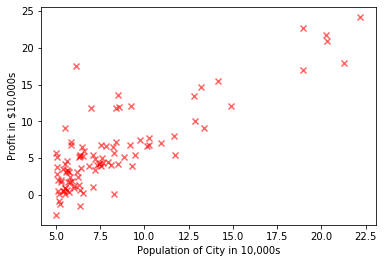

In [327]:
plot_data(X[:, 1], y)
plt.show()

## Formulas

In [314]:
def read_image(file, size=(5.5, 5.5)):
    img = mpimg.imread(file)
    plt.figure(figsize=size)
    plt.imshow(img)
    plt.show()


Cost Function:

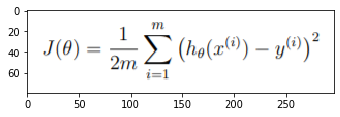

In [315]:
read_image("cost function.PNG")

Hypothesis (linear model):

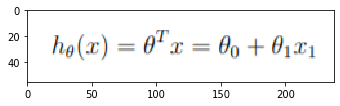

In [316]:
read_image("hypothesis linear function.PNG")

Updating coefficients

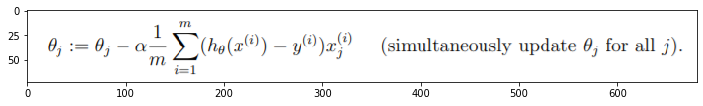

In [317]:
read_image("update theta.PNG", (12, 12))

## Cost Function

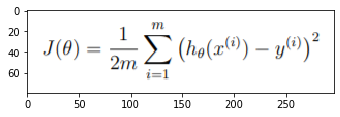

In [318]:
read_image("cost function.PNG")

In [319]:
X[0:10]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598],
       [1.    , 8.3829],
       [1.    , 7.4764],
       [1.    , 8.5781],
       [1.    , 6.4862],
       [1.    , 5.0546]])

In [320]:
# Calculate cost
def calculate_cost(X, y, theta):
#     h = theta[0] * X[0] + theta[1] * X[1]
    h = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum((h[0] - y) ** 2)
    
    return J

In [321]:
calculate_cost(X, y, theta)

32.072733877455676

In [322]:
print(theta)

[[0.]
 [0.]]


In [323]:
X[:, 1]

array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
        8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
        5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
       20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
       13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
        7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
       11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
        5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
        6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
       14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
       10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
        5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
        6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
        7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [324]:
y

0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
        ...   
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: 1, Length: 97, dtype: float64

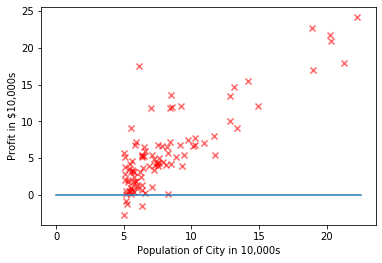

In [328]:
def plot_estimate(X, y, theta):
    plot_data(X, y)
    x1, y1, x2, y2 = 5, 0, 22, 25
    p1 = (theta[0][0], theta[1][0] * 0)
    p2 = (22.5, theta[1][0] * 22.5)
    points = list(zip(p1, p2))
    plt.plot(points[0], points[1])
    
plot_estimate(X[:, 1], y, theta)
plt.show()

## Gradient Descent

In [335]:
X, y, m, theta, iterations, alpha = init_data(data)

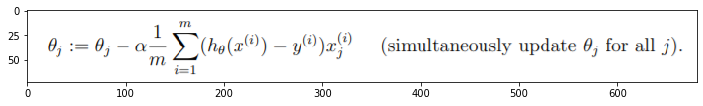

In [336]:
read_image("update theta.PNG", (12, 12))

In [338]:
calculate_cost(X, y, theta)

32.072733877455676

In [341]:
h = X.dot(theta)
theta1 = theta[0] - alpha * ((1 / m) * np.sum((h[0] - y) * X[:, 0]))
theta2 = theta[1] - alpha * ((1 / m) * np.sum((h[0] - y) * X[:, 1]))
theta = [theta1, theta2]

In [342]:
calculate_cost(X, y, theta)

16.625398538754816